In [3]:
# 下載Iris 資料集
import seaborn as sns
iris = sns.load_dataset('iris')
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


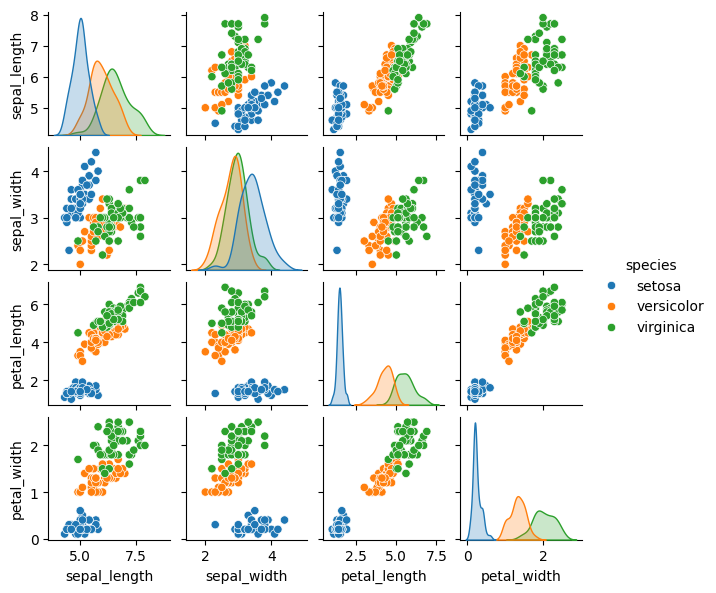

In [4]:
# 畫出各特徵間的關聯性
%matplotlib inline
import seaborn as sns
sns.pairplot(iris, hue='species', height=1.5);

In [8]:
# 擷取特徵矩陣與目標陣列
X_iris = iris.drop('species',axis=1)
print(X_iris.shape)

y_iris = iris['species']
print(y_iris.shape)

(150, 4)
(150,)


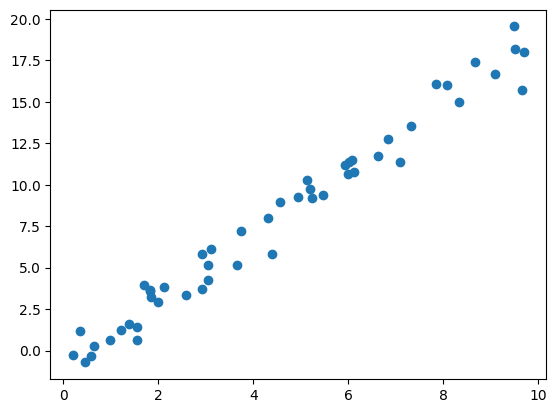

In [10]:
# 建立簡單的資料作為範例
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [ ]:
# 引入線性迴歸模型類別
from sklearn.linear_model import LinearRegression

In [12]:
# 選用fit_intercept 超參數
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

In [20]:
# 轉換x 為特徵矩陣
X = x[:, np.newaxis]
X.shape

(50, 1)

In [21]:
# 使用fit方法 訓練模型
model.fit(X, y)

LinearRegression()

In [22]:
# 查看模型結果 通常是在後面加下底線
print(model.coef_)
print(model.intercept_)

[1.9776566]
-0.903310725531111


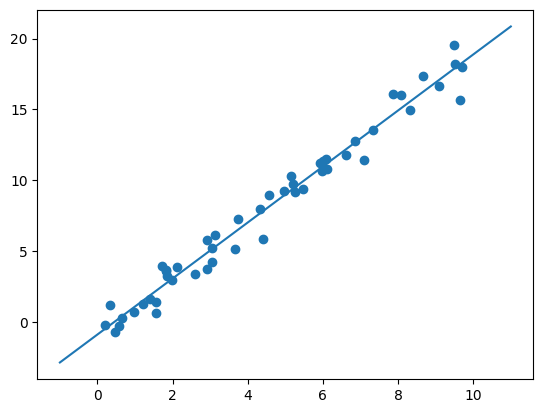

In [25]:
# 建立新的資料
xfit = np.linspace(-1, 11)

# 轉為特徵矩陣
Xfit = xfit[:, np.newaxis]

# 餵給模型預測
yfit = model.predict(Xfit)

# 原始資料用散佈圖呈現
plt.scatter(x, y)

# 新資料用直線呈現
plt.plot(xfit, yfit);

In [27]:
# 分割測試與訓練集
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

# 建模
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# 訓練模型
model.fit(Xtrain, ytrain)

# 預測測試集
y_model = model.predict(Xtest)

# 使用accuracy_score 比較模型預測與實際測試集標籤的準確度
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

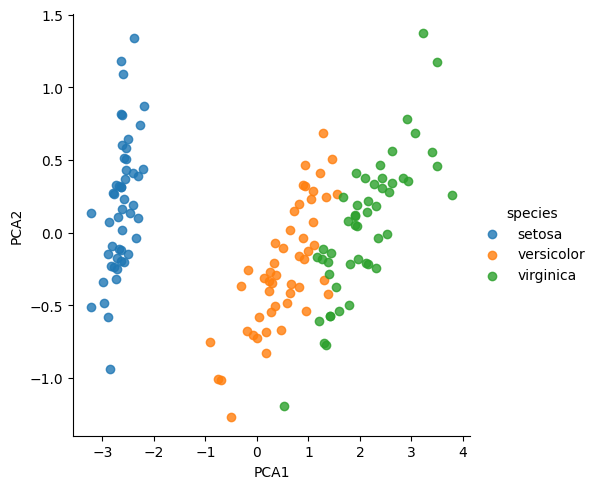

In [ ]:
# 使用主成分分析(PCA) 要求模型傳回兩個成分
from sklearn.decomposition import PCA
model = PCA(n_components=2)

# 訓練模型
model.fit(X_iris)

# 轉換資料
X_2D = model.transform(X_iris)

# 將PCA 得到的兩個成分加入原始的iris DataFrame
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]

# 二維視覺化PCA 結果
sns.lmplot(x="PCA1", y="PCA2", hue='species', data=iris, fit_reg=False);

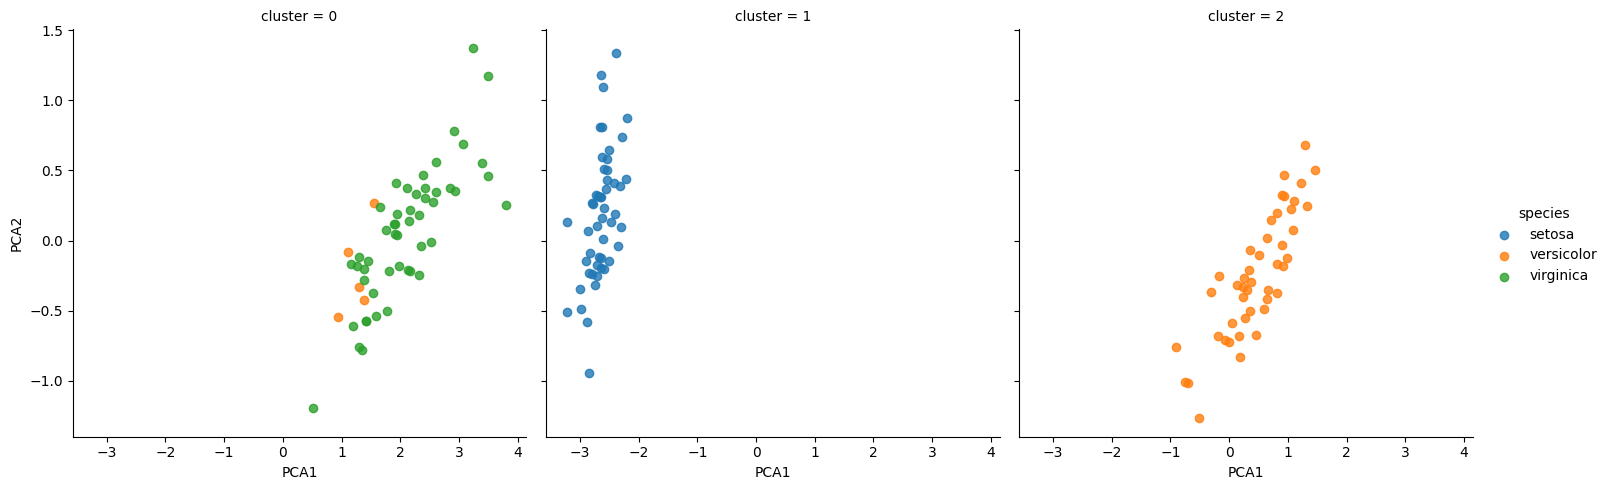

In [31]:
# 選擇高斯混合模型
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=3,
                        covariance_type='full')

# 訓練模型
model.fit(X_iris)

# 預測資料
y_gmm = model.predict(X_iris)

# 將標籤加入iris DataFrame
iris['cluster'] = y_gmm

# 繪出結果
sns.lmplot(x='PCA1', y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

In [1]:
# 載入資料
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

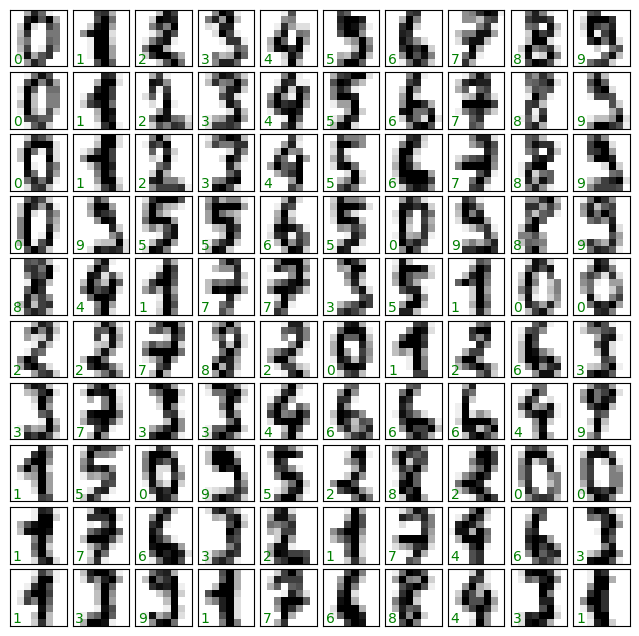

In [2]:
# 畫出前一百個樣本
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [6]:
# 使用 64 個像素值的特徵 才能變成二維特徵矩陣
X = digits.data
print(X.shape)

y = digits.target
print(y.shape)

(1797, 64)
(1797,)


In [7]:
# 使用Isomap 流形學習演算法 將資料降維成兩個維度
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
print(data_projected.shape)

c:\Users\coffi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_isomap.py:360: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\coffi\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\sparse\_index.py:155: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


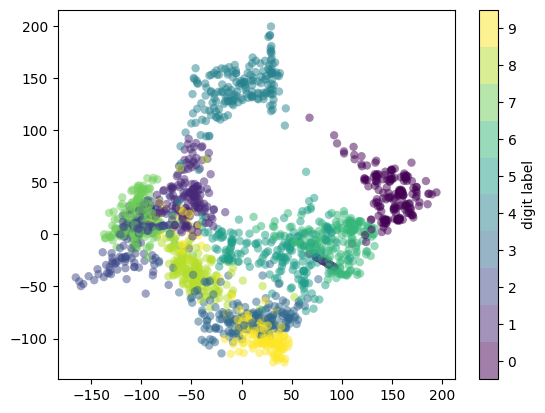

In [12]:
# 繪出降維後的資料
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolors='none', alpha=0.5,
            cmap=plt.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5)

In [14]:
# 分測試訓練集並使用高斯天真貝氏模型
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

# 計算準確率
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

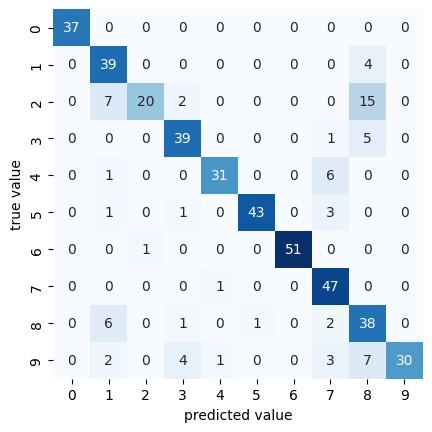

In [16]:
# 使用混淆矩陣(confusion matrix)
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

import seaborn as sns
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

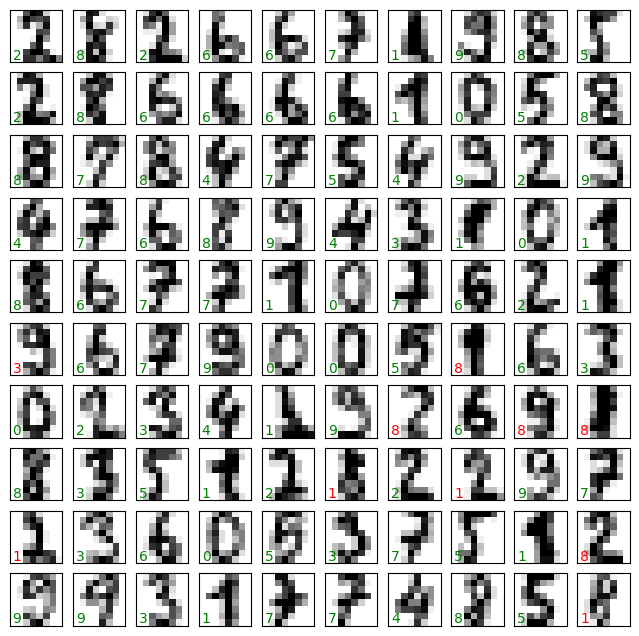

In [ ]:
# 使用另外一個方式顯示輸出標籤
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]})

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i]==y_model[i]) else 'red')